# Pymaceuticals Inc.
---

### Analysis Luisa

- Capomulin reduces the tumor volume of the mouse I509 significantly over 40 days of treatment.
- The drug Infubinol has a outlier with a tumor volume of 35mm3.
- The weight has a direct relationship with the tumor size. By that I mean that the more mouse weight then the large tumor. 
 

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_frame = pd.merge(study_results, mouse_metadata, how = "left", on= "Mouse ID")

# Display the data table for preview
study_data_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [10]:
# Checking the number of mice.
number_of_mice = len(study_data_frame["Mouse ID"].unique())
print (number_of_mice)

249


In [11]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_frame.loc[study_data_frame.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
print (duplicate_mouse_ids)

['g989']


In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = study_data_frame.loc[study_data_frame["Mouse ID"] == "g989"]
duplicate_mouse_ids.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_frame = study_data_frame[study_data_frame['Mouse ID'].isin(duplicate_mouse_ids) == False]
clean_study_data_frame.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.
number_of_clean_mice = len(clean_study_data_frame["Mouse ID"].unique())
print(number_of_clean_mice)

249


## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_TV = clean_study_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_TV = clean_study_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_TV = clean_study_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_TV = clean_study_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_TV = clean_study_data_frame.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_table = pd.DataFrame({
"Mean Tumor Volume":mean_TV,
"Median Tumor Volume":median_TV,
"Tumor Volume Variance":variance_TV,
"Tumor Volume Std. Dev.":std_TV,
"Tumor Volume Std. Err.":sem_TV})



summary_table.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [22]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = clean_study_data_frame.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_table.head()
                                                                                        

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466

## Bar and Pie Charts

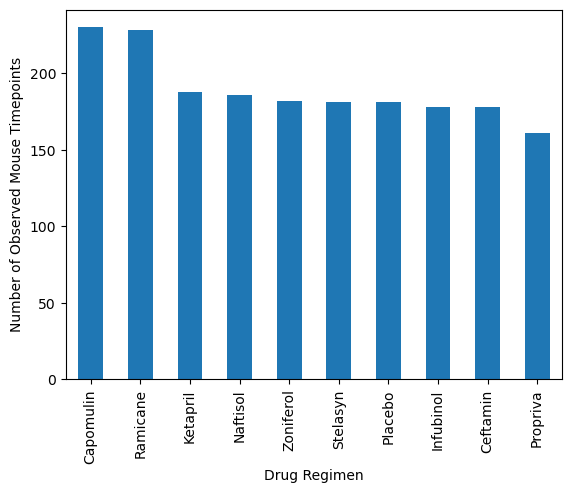

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_mice = clean_study_data_frame['Drug Regimen'].value_counts()
count_mice.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

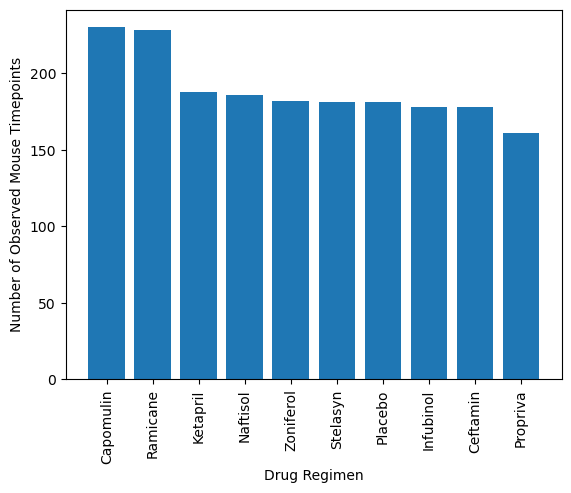

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_mice = clean_study_data_frame['Drug Regimen'].value_counts()
plt.bar(count_mice.index.values,count_mice.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Observed Mouse Timepoints")
plt.show()

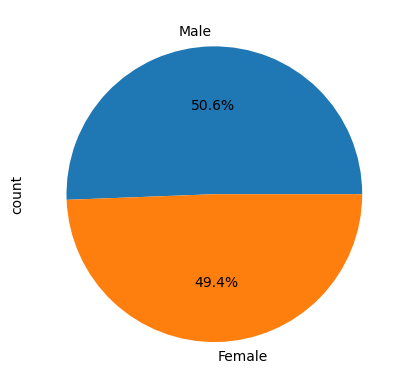

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count_mice = clean_study_data_frame.Sex.value_counts()
count_mice.plot(kind="pie",autopct='%1.1f%%')
plt.show()

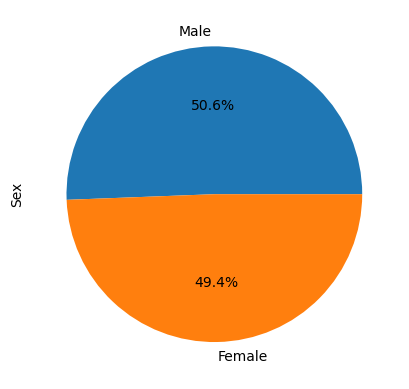

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_mice = clean_study_data_frame.Sex.value_counts()
plt.pie(count_mice.values,labels=count_mice.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_study_data_frame.groupby (["Mouse ID"])['Timepoint'].max ()
max_timepoint = max_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_tumor_lastpoint = max_timepoint.merge(clean_study_data_frame, on=['Mouse ID', 'Timepoint'], how="left")
merged_data_tumor_lastpoint.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data_tumor_lastpoint.loc[merged_data_tumor_lastpoint ["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_volume_list.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    Quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerquartiles = Quartiles[0.25]
    upperquartiles = Quartiles[0.75]
    iqr = upperquartiles - lowerquartiles
    lower_bounds = lowerquartiles - (1.5*iqr)
    upper_bounds = upperquartiles + (1.5*iqr)
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bounds) | (final_tumor_volume > upper_bounds)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


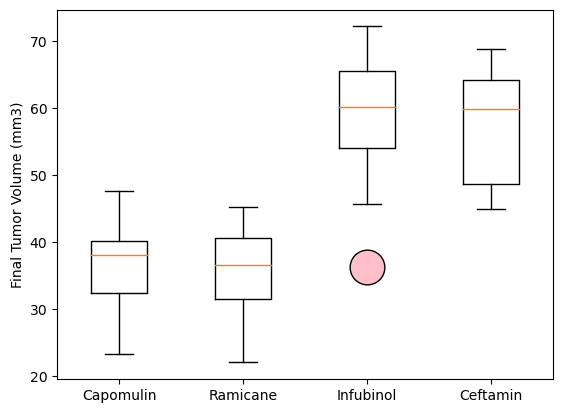

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
value_out = dict(markerfacecolor='pink',markersize=25)
plt.boxplot(tumor_volume_list, labels = treatment_list,flierprops=value_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

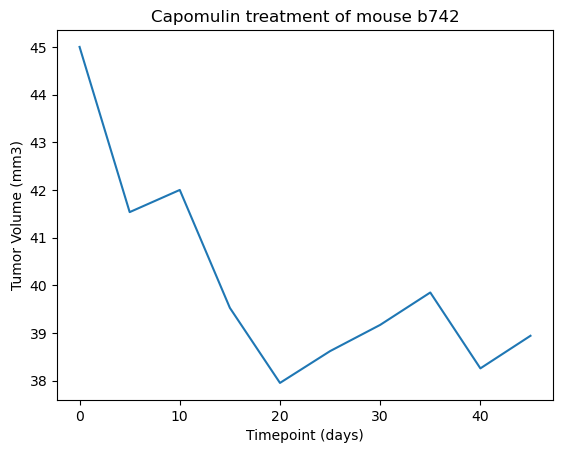

In [55]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = clean_study_data_frame.loc[clean_study_data_frame['Drug Regimen'] == "Capomulin"]
mouse_data = capomulin_data.loc[capomulin_data['Mouse ID']== 'b742']
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse b742')
plt.show()


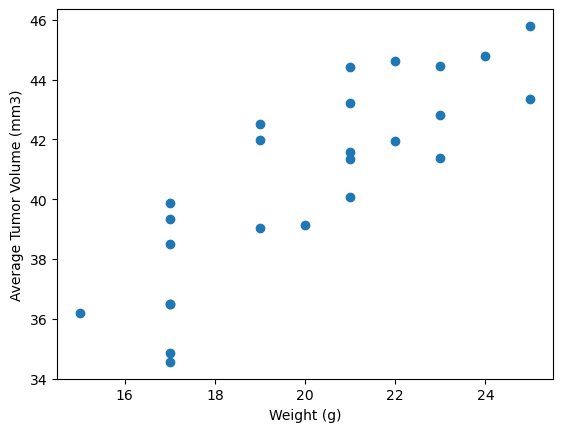

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table = clean_study_data_frame.loc[clean_study_data_frame['Drug Regimen'] == "Capomulin"]
capomulin_average = capomulin_table.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84!


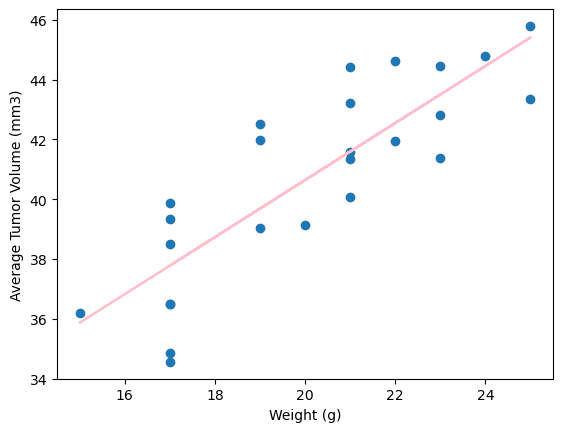

In [58]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}!")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

y_values = capomulin_average['Weight (g)']*model[0]+model[1]
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="pink")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()